In [8]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sms

os.chdir('../Data_Out')
###os.listdir()
ASRD = pd.read_csv('AllSharedRewardData.csv')
SubnMood = pd.read_csv('Substance_and_Mood_data_SCORED.csv')
PCAcloseness = pd.read_csv('PCA_and_z-score.csv')

totalscores = ['sub','score_susd_mania','score_susd_depress', 'audit_total','dudit_total']
keepcolumns = [col for col in SubnMood.columns if col.startswith('aadis_')]
keepcolumns = totalscores + keepcolumns
ASRD = pd.merge(ASRD, SubnMood[keepcolumns], on = 'sub', how = 'right')
ASRD = pd.merge(ASRD, PCAcloseness, on = 'sub', how = 'right')
ASRD.tail()

,Unnamed: 0,sub,gender,SPSRWD,BISBAS_BAS,PC1,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,...,screen_age,closeness_rating,score_susd_mania,score_susd_depress,audit_total,dudit_total,PCA,closeness_s,closeness_c,closeness_f
58,86.0,3210,2.0,14.0,41.0,2.652562,4.0,-5.0,-5.0,-5.0,...,18.185178,3.0,9.0,7.0,1.0,0.000000,2.596277,NaN,NaN,2.0
59,87.0,3212,1.0,7.0,36.0,-5.611066,3.0,0.0,-2.0,-5.0,...,19.121543,7.0,7.0,4.0,0.0,0.000000,-5.572597,NaN,NaN,4.0
60,88.0,3218,2.0,13.0,37.0,-1.105406,5.0,5.0,5.0,-5.0,...,NaN,NaN,NaN,NaN,5.0,28.181818,-1.222267,NaN,NaN,3.0
61,NaN,3220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,3.0,5.0,0.000000,0.391727,5.0,5.0,5.0
62,NaN,3223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.000000,-1.812822,NaN,NaN,NaN


,sub
gender,
1.0,33
2.0,15


,PC1,closeness_f
gender,,
1.0,-0.041289,4.939394
2.0,-0.085741,4.266667


(array([ 6.,  6.,  6.,  6., 10.,  3.,  4.,  1.,  0.,  1.]),
 array([18.18517834, 18.99476603, 19.80435373, 20.61394142, 21.42352912,
        22.23311681, 23.0427045 , 23.8522922 , 24.66187989, 25.47146759,
        26.28105528]),
 <BarContainer object of 10 artists>)

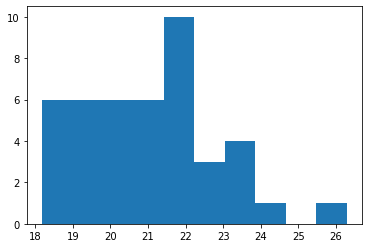

In [9]:
female = ASRD.query('gender == "1"')['PC1']
male = ASRD.query('gender == "2"')['PC1']
#ASRD['closeness_f'].max()
display(ASRD[['sub','gender']].groupby('gender').count(),
       ASRD[['PC1','closeness_f','gender']].groupby('gender').mean())

plt.hist(ASRD[['screen_age']])

In [11]:
PC1 = ASRD[ASRD['gender']==2]['PC1']
IOS = ASRD[ASRD['gender']==2]['closeness_f']
r,p = stats.pearsonr(PC1,IOS)
print("Reward Sensitivity & closeness with friend (men)  -  r: %s ; p: %s" %(r,p))

PC1 = ASRD[ASRD['gender']==1]['PC1']
IOS = ASRD[ASRD['gender']==1]['closeness_f']
r,p = stats.pearsonr(PC1,IOS)
print("Reward Sensitivity & closeness with friend (women)  -  r: %s ; p: %s" %(r,p))

Reward Sensitivity & closeness with friend (men)  -  r: -0.011583223972420481 ; p: 0.9673193465288201
Reward Sensitivity & closeness with friend (women)  -  r: 0.07808152038623238 ; p: 0.6658071700604797


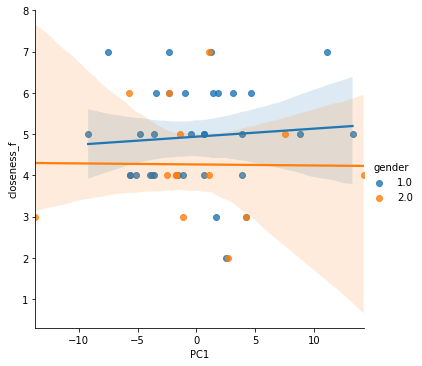

In [12]:
g=sms.lmplot(x='PC1',y='closeness_f', data=ASRD, hue='gender')

In [1]:
ASRD['Win-Diff-F-C'] = ASRD['Win-Friend'] - ASRD['Win-Comp']
ASRD['Lose-Diff-F-C'] = ASRD['Lose-Friend'] - ASRD['Lose-Comp']

ASRD['Win-Diff-F-S'] = ASRD['Win-Friend'] - ASRD['Win-Stranger']
ASRD['Lose-Diff-F-S'] = ASRD['Lose-Friend'] - ASRD['Lose-Stranger']

ASRD['Win-Diff-S-C'] = ASRD['Win-Stranger'] - ASRD['Win-Comp']
ASRD['Lose-Diff-S-C'] = ASRD['Lose-Stranger'] - ASRD['Lose-Comp']

ASRD.to_csv('FullSharedRewardData.csv', index = False)


cormat=ASRD.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)

NameError: name 'ASRD' is not defined

In [21]:
winfriend = ASRD["Win-Friend"].mean()
print("Mean of reported reward from winning with friend: %s out of 5" %(winfriend))
winstranger = ASRD["Win-Stranger"].mean()
print("Mean of reported reward from winning with stranger: %s out of 5" %(winstranger))
wincomp = ASRD["Win-Comp"].mean()
print("Mean of reported reward from winning with computer: %s  out of 5" %(wincomp))

Mean of reported reward from winning with friend: 3.6875 out of 5
Mean of reported reward from winning with stranger: 0.8541666666666666 out of 5
Mean of reported reward from winning with computer: 0.5625  out of 5


In [36]:
ASRD_RS = ASRD.dropna(subset=['PC1','closeness_f','audit_total'])

ASRD_RS.isnull().sum()

Unnamed: 0             0
sub                    0
gender                 0
SPSRWD                 0
BISBAS_BAS             0
PC1                    0
Win-Friend             0
Win-Stranger           0
Win-Comp               0
Lose-Friend            0
Lose-Stranger          0
Lose-Comp              0
screen_age             4
closeness_rating       3
score_susd_mania       7
score_susd_depress     7
audit_total            0
dudit_total            0
PCA                    0
closeness_s           16
closeness_c           16
closeness_f            0
Win-Diff-F-C           0
Lose-Diff-F-C          0
Win-Diff-F-S           0
Lose-Diff-F-S          0
Win-Diff-S-C           0
Lose-Diff-S-C          0
dtype: int64

In [37]:
r,p = stats.pearsonr(ASRD_RS['Win-Friend'], ASRD_RS['PC1'])
print("Win-Friend & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Stranger'], ASRD_RS['PC1'])
print("Win-Stranger & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Comp'], ASRD_RS['PC1'])
print("Win-Comp & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Friend'], ASRD_RS['PC1'])
print("Lose-Friend & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Stranger'], ASRD_RS['PC1'])
print("Lose-Stranger & RS PCA  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Comp'], ASRD_RS['PC1'])
print("Lose-Comp & RS PCA  -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(ASRD_RS['Win-Friend'], ASRD_RS['closeness_f'])
print("Win-Friend & closeness with friend  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Stranger'], ASRD_RS['closeness_f'])
print("Win-Stranger & closeness with friend  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Friend'], ASRD_RS['closeness_f'])
print("Lose-Friend & closeness with friend  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Stranger'], ASRD_RS['closeness_f'])
print("Lose-Stranger & closeness with friend  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Comp'], ASRD_RS['SPSRWD'])
print("Win-Comp & SPSRWD  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Win-Diff-F-C'], ASRD_RS['PC1'])
print("Win-Diff friend-computer & reward sensitivity  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['Lose-Diff-F-C'], ASRD_RS['PC1'])
print("Lose-Diff friend-computer & reward sensitivity  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['gender'], ASRD_RS['PC1'])
print("Gender & reward sensitivity  -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(ASRD_RS['Win-Comp'], ASRD_RS['audit_total'])
print("Win-Comp & alcohol usage  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_RS['dudit_total'], ASRD_RS['audit_total'])
print("Drug & alcohol usage  -  r: %s ; p: %s" %(r,p))

Win-Friend & RS PCA  -  r: 0.2373617637320139 ; p: 0.11220611320085062
Win-Stranger & RS PCA  -  r: -0.07680459358042677 ; p: 0.6119241944115975
Win-Comp & RS PCA  -  r: -0.3032951405294664 ; p: 0.040464249486862926
Lose-Friend & RS PCA  -  r: -0.06373249833458726 ; p: 0.6739104839803629
Lose-Stranger & RS PCA  -  r: -0.19571733738131927 ; p: 0.1923915810291845
Lose-Comp & RS PCA  -  r: 0.07894135891471787 ; p: 0.6020277721139499
Win-Friend & closeness with friend  -  r: 0.12782029944438883 ; p: 0.39725068391670343
Win-Stranger & closeness with friend  -  r: 0.39346277924293516 ; p: 0.006825804430386747
Lose-Friend & closeness with friend  -  r: 0.015261594924680946 ; p: 0.919815341396759
Lose-Stranger & closeness with friend  -  r: 0.0007743814985168573 ; p: 0.9959247695280654
Win-Comp & SPSRWD  -  r: -0.3159948176178561 ; p: 0.032407155822601785
Win-Diff friend-computer & reward sensitivity  -  r: 0.41078125426584233 ; p: 0.004572098511734238
Lose-Diff friend-computer & reward sensit

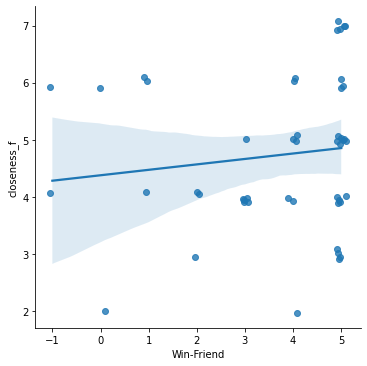

<class 'seaborn.axisgrid.FacetGrid'>


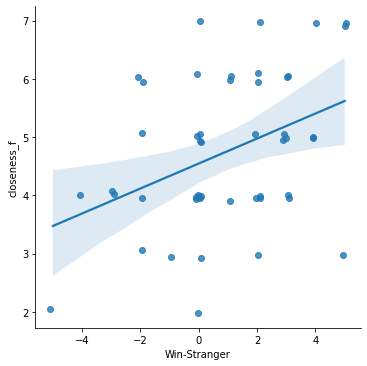

<class 'seaborn.axisgrid.FacetGrid'>


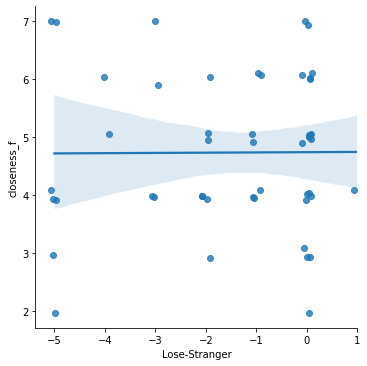

<class 'seaborn.axisgrid.FacetGrid'>


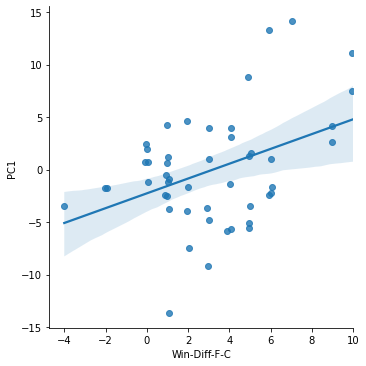

<class 'seaborn.axisgrid.FacetGrid'>


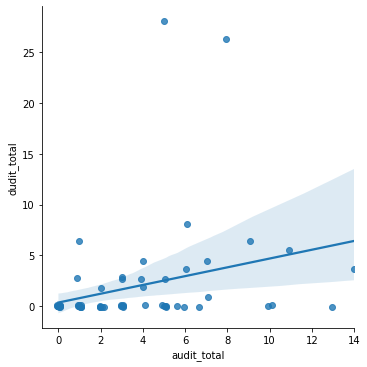

<class 'seaborn.axisgrid.FacetGrid'>


In [40]:
g=sms.lmplot(x='Win-Friend',y='closeness_f',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='Win-Stranger',y='closeness_f',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='Lose-Stranger',y='closeness_f',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='Win-Diff-F-C',y='PC1',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='audit_total',y='dudit_total',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

In [ ]:
ASRD_SUSD = ASRD.dropna(subset=['score_susd_mania'])

r,p = stats.pearsonr(ASRD_SUSD['PC1'], ASRD_SUSD['score_susd_mania'])
print("RS PCA & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Win-Diff-C'], ASRD_SUSD['score_susd_mania'])
print("Win-Diff & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Lose-Diff-C'], ASRD_SUSD['score_susd_depress'])
print("Lose-Diff & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Win-Comp'], ASRD_SUSD['score_susd_mania'])
print("Win-Comp & Mania  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Win-Comp'], ASRD_SUSD['score_susd_depress'])
print("Win-Comp & Depression  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Lose-Comp'], ASRD_SUSD['score_susd_depress'])
print("Lose-Comp & Depression  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['Lose-Friend'], ASRD_SUSD['score_susd_depress'])
print("Lose-Friend & Depression  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_SUSD['score_susd_mania'], ASRD_SUSD['score_susd_depress'])
print("Mania & Depression  -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(ASRD_SUSD['Win-Friend'], ASRD_SUSD['screen_age'])
print("Win-Friend & Age  -  r: %s ; p: %s" %(r,p))

In [ ]:
ASRD_age = ASRD.dropna(subset=['screen_age'])
r,p = stats.pearsonr(ASRD_age['Lose-Diff-C'], ASRD_age['screen_age'])
print("Lose-Diff & Age  -  r: %s ; p: %s" %(r,p))
r,p = stats.pearsonr(ASRD_age['PC1'], ASRD_age['screen_age'])
print("RS PCA & Age  -  r: %s ; p: %s" %(r,p))

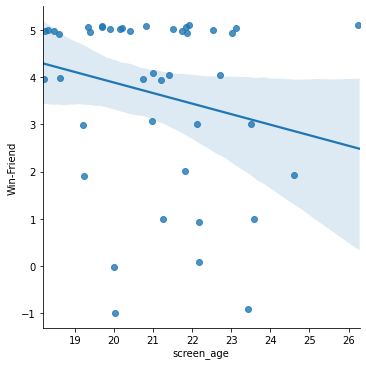

<class 'seaborn.axisgrid.FacetGrid'>


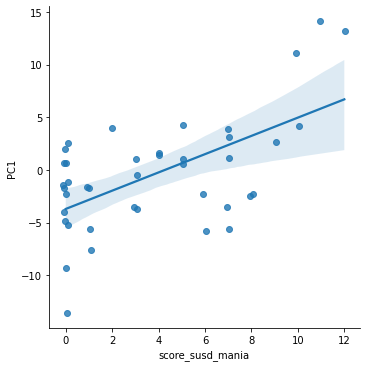

<class 'seaborn.axisgrid.FacetGrid'>


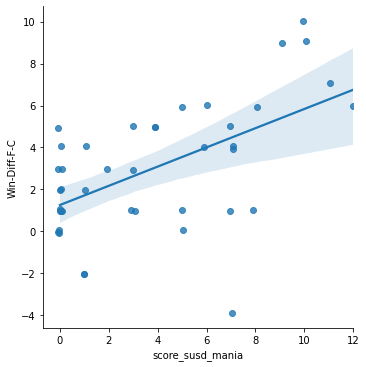

<class 'seaborn.axisgrid.FacetGrid'>


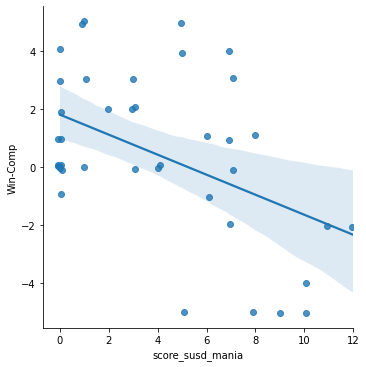

<class 'seaborn.axisgrid.FacetGrid'>


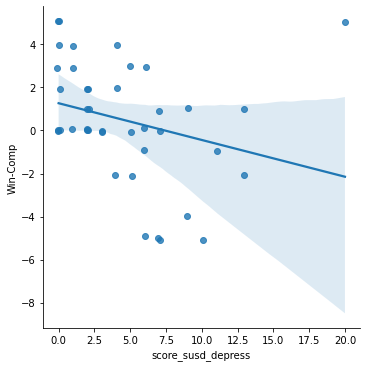

<class 'seaborn.axisgrid.FacetGrid'>


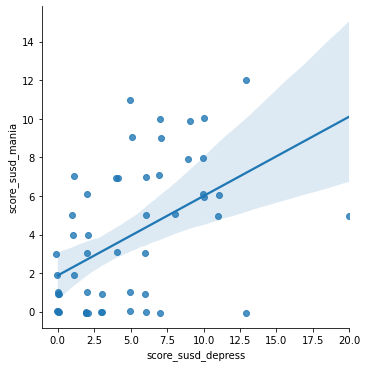

<class 'seaborn.axisgrid.FacetGrid'>


In [41]:
g=sms.lmplot(x='screen_age',y='Win-Friend',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_mania',y='PC1',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_mania',y='Win-Diff-F-C',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_mania',y='Win-Comp',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))
g=sms.lmplot(x='score_susd_depress',y='Win-Comp',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

g=sms.lmplot(x='score_susd_depress',y='score_susd_mania',data=ASRD, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))